In [1]:
import pandas as pd
import gc
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def plot_columns(df, x_col, y_col, title="Scatter Plot", xlabel=None, ylabel=None):

    plt.figure(figsize=(10, 5))
    plt.plot(df[x_col], df[y_col], marker='o', linestyle='-')

    plt.xlabel(xlabel if xlabel else x_col)
    plt.ylabel(ylabel if ylabel else y_col)
    plt.title(title)
    plt.grid(True)
    plt.show()


In [3]:
def plot_box(df, column, title="Box Plot", ylabel=None):

    plt.figure(figsize=(8, 5))
    sns.boxplot(y=df[column])
    
    plt.title(title)
    plt.ylabel(ylabel if ylabel else column)
    plt.grid(True)
    plt.show()

In [10]:
def filter_a_day(specific_date,df):

    
    df_filtered = df[df['timestamp'].dt.date == pd.to_datetime(specific_date).date()]

    df_filtered = df_filtered.reset_index(drop=True)

    return df_filtered

In [5]:
def aggregate_as_a_minute(df_day1):
    df_day1 = df_day1.set_index('timestamp')

    # Resample data by minute and compute mean
    df_minute_avg_day1 = df_day1.resample('T').mean().reset_index()

    return df_minute_avg_day1

In [7]:
df = pd.read_csv('/Users/abdullahfurkanarslan/Desktop/metropt+3+dataset 2/MetroPT3(AirCompressor).csv')

In [12]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.head()

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,10,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2,20,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3,30,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
4,40,2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [14]:
df_day1 = filter_a_day("2020-02-01",df)
df_day1

,Unnamed: 0,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,10,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2,20,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3,30,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
4,40,2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7139,71390,2020-02-01 23:19:41,-0.012,9.686,9.668,-0.022,9.686,46.400,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
7140,71400,2020-02-01 23:19:51,-0.010,9.678,9.660,-0.022,9.676,46.525,0.0325,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
7141,71410,2020-02-01 23:20:01,-0.010,9.668,9.650,-0.022,9.666,46.650,0.0325,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
7142,71420,2020-02-01 23:20:11,-0.012,9.658,9.642,-0.022,9.658,46.750,0.0300,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [16]:
def aggregate_as_a_minute(df_day1):
    df_day1 = df_day1.set_index('timestamp')

    # Resample data by minute and compute mean
    df_minute_avg_day1 = df_day1.resample('T').mean().reset_index()

    return df_minute_avg_day1

df_day1 = aggregate_as_a_minute(df_day1)
df_day1

/var/folders/pr/50hgsxm96n7_g8xjv3rsnryw0000gn/T/ipykernel_1340/1566251721.py:5: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_minute_avg_day1 = df_day1.resample('T').mean().reset_index()


,timestamp,Unnamed: 0,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,2020-02-01 00:00:00,30.0,-0.012286,9.327429,9.311143,-0.022857,9.328000,53.521429,0.040357,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,2020-02-01 00:01:00,95.0,-0.013000,9.260000,9.243333,-0.023333,9.259667,53.420833,0.040000,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2,2020-02-01 00:02:00,155.0,-0.012667,9.198333,9.182000,-0.022333,9.199000,53.325000,0.040000,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3,2020-02-01 00:03:00,215.0,-0.012333,9.136667,9.120667,-0.022667,9.136667,53.200000,0.040000,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
4,2020-02-01 00:04:00,275.0,-0.013000,9.075667,9.060000,-0.023000,9.075667,53.129167,0.040000,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1396,2020-02-01 23:16:00,71195.0,-0.012333,9.894333,9.879333,-0.022333,9.893667,47.708333,4.027500,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1397,2020-02-01 23:17:00,71255.0,-0.010667,9.819000,9.803667,-0.022333,9.819333,46.604167,3.968333,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1398,2020-02-01 23:18:00,71315.0,-0.010333,9.757000,9.740333,-0.022000,9.756333,45.950000,3.990000,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1399,2020-02-01 23:19:00,71375.0,-0.011000,9.700000,9.682667,-0.022000,9.699333,46.208333,2.678750,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


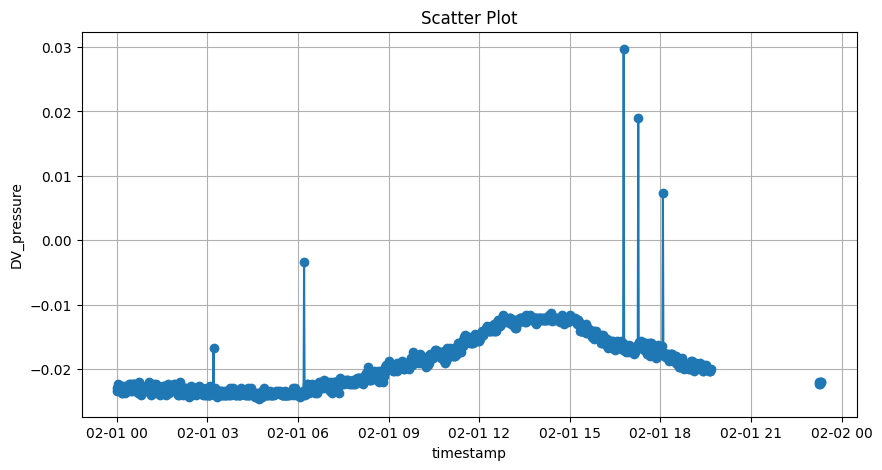

In [20]:
plot_columns(df_day1,"timestamp", "DV_pressure")

/var/folders/pr/50hgsxm96n7_g8xjv3rsnryw0000gn/T/ipykernel_1340/1566251721.py:5: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_minute_avg_day1 = df_day1.resample('T').mean().reset_index()


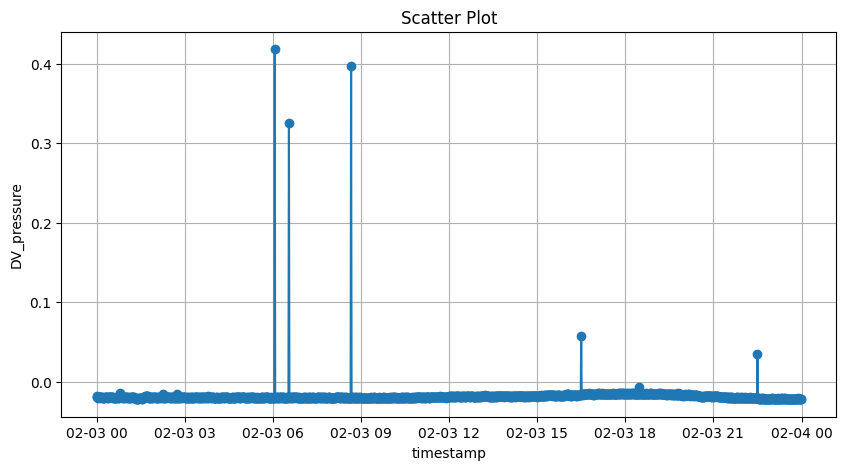

In [23]:
plot_columns(aggregate_as_a_minute(filter_a_day("2020-02-03", df)),"timestamp", "DV_pressure")

/var/folders/pr/50hgsxm96n7_g8xjv3rsnryw0000gn/T/ipykernel_1340/1566251721.py:5: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_minute_avg_day1 = df_day1.resample('T').mean().reset_index()


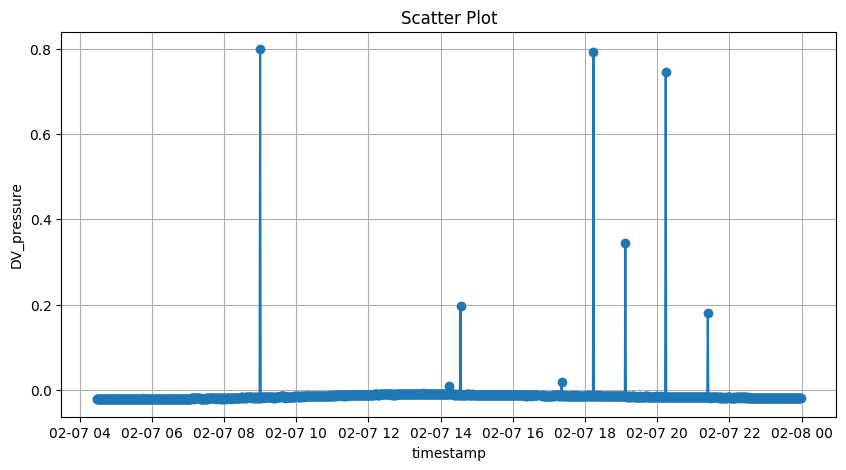

In [25]:
plot_columns(aggregate_as_a_minute(filter_a_day("2020-02-07", df)),"timestamp", "DV_pressure")

/var/folders/pr/50hgsxm96n7_g8xjv3rsnryw0000gn/T/ipykernel_1340/1566251721.py:5: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_minute_avg_day1 = df_day1.resample('T').mean().reset_index()


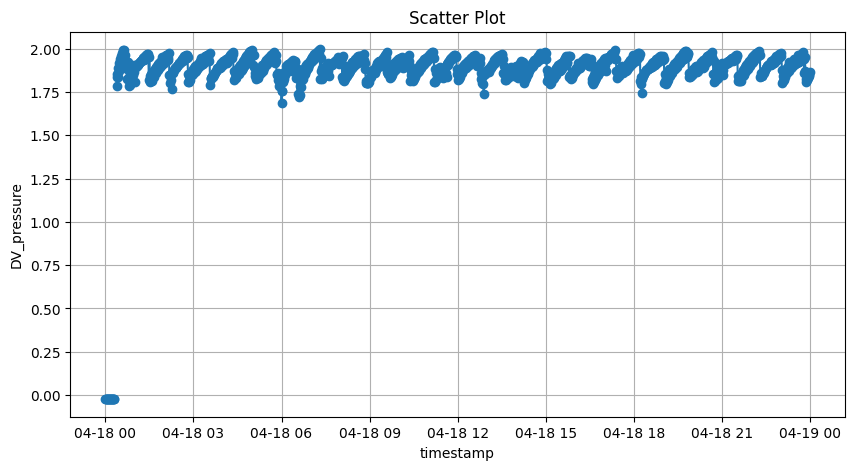

In [26]:
plot_columns(aggregate_as_a_minute(filter_a_day("2020-04-18", df)),"timestamp", "DV_pressure")

/var/folders/pr/50hgsxm96n7_g8xjv3rsnryw0000gn/T/ipykernel_1340/1566251721.py:5: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_minute_avg_day1 = df_day1.resample('T').mean().reset_index()


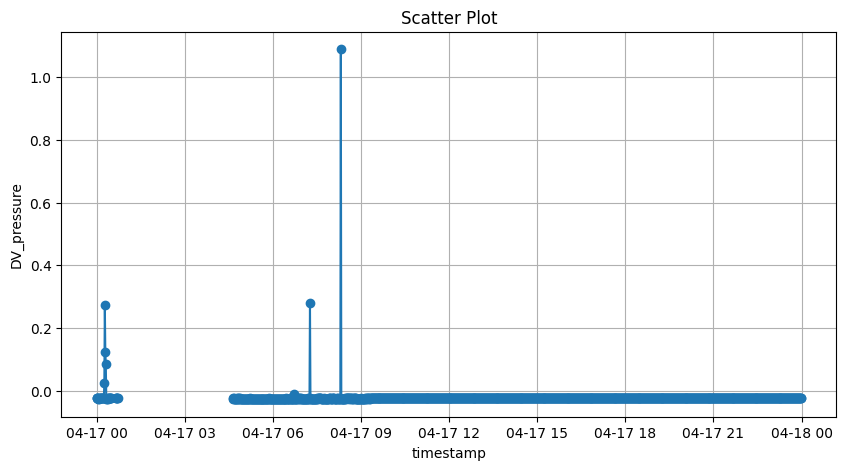

In [28]:
plot_columns(aggregate_as_a_minute(filter_a_day("2020-04-17", df)),"timestamp", "DV_pressure")

/var/folders/pr/50hgsxm96n7_g8xjv3rsnryw0000gn/T/ipykernel_1340/1566251721.py:5: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_minute_avg_day1 = df_day1.resample('T').mean().reset_index()


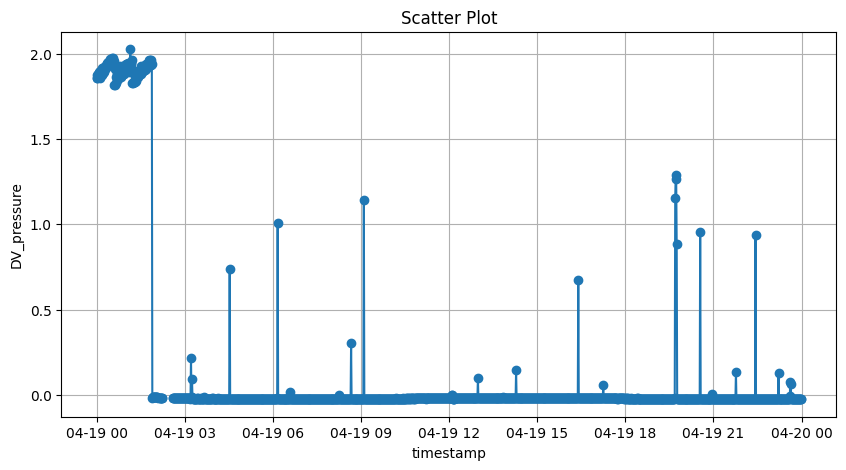

In [29]:
plot_columns(aggregate_as_a_minute(filter_a_day("2020-04-19", df)),"timestamp", "DV_pressure")